# Trinity atomic bomb test

From the [Atomic Archive](https://www.atomicarchive.com/media/photographs/trinity/index.html): 

"On July 16, 1945, at 5:29:45 AM, a light "brighter than a thousand suns," filled the valley. As the now familiar mushroom cloud rose in to the sky, Oppenheimer quoted from Hindu scripture, the Bhagavad-gita, "Now I am become death, the destroyer of worlds." The world had entered the nuclear age."

Despite the tragic consequences of this test and the technology development of which it was a part, we will analyze this system as we do many others in physics and we will attempt to determine the functional relationship among the various aspects of the system and compare to data.

## Software setup

First, we need to import some python packages for the analysis. 

In [1]:
# The packages we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the notebook option to show us the plots in the browser
%matplotlib inline

# Configure some of the matplotlib plotting options
plt.rcParams['figure.facecolor'] = 'w'
from matplotlib import rc
rc('text',usetex=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.titlesize'] = 30

## Data from the Trinity test

Data are originally from [G.I. Taylor *The formation of a blast wave by a very intense explosion: II. The atomic explosion of 1945.* Proc. R. Soc. Lond. **A201** 175–186](https://royalsocietypublishing.org/doi/pdf/10.1098/rspa.1950.0050#page=2). 

A version of this notebook was developed and provided by [Jorge Diaz](https://jsdiazpo.github.io/bio.html) a data scientist at BASF who received a Ph.D. in Theoretical Physics from Indiana University Bloomington. Credit and thanks to Dr. Diaz!

In [2]:
df_Trinity = pd.read_csv('GITaylor_Trinity_data.csv')

Always a good idea to just print out and look at your data before you do anything else.

In [3]:
df_Trinity

,t_msec,R_m
0,0.10,11.1
1,0.24,19.9
2,0.38,25.4
3,0.52,28.8
4,0.66,31.9
5,0.80,34.2
6,0.94,36.3
7,1.08,38.9
8,1.22,41.0
9,1.36,42.8


First, let's change to seconds so that our *dimensionful* calculations later on will make more sense.

In [4]:
df_Trinity['t_sec'] = df_Trinity['t_msec'] * 1e-3  # convert msec to sec

Second, let's pre-calculate the quantities that we plotted (by hand) in lecture.

In [5]:
df_Trinity['log10_t']     = df_Trinity['t_sec'].apply(lambda x: np.log10(x))
df_Trinity['5/2*log10_R'] = df_Trinity['R_m'].apply(lambda x: 5/2*np.log10(x))

Print out the data again to make sure it makes sense.

In [6]:
df_Trinity

,t_msec,R_m,t_sec,log10_t,5/2*log10_R
0,0.10,11.1,0.00010,-4.000000,2.613307
1,0.24,19.9,0.00024,-3.619789,3.247133
2,0.38,25.4,0.00038,-3.420216,3.512084
3,0.52,28.8,0.00052,-3.283997,3.648481
4,0.66,31.9,0.00066,-3.180456,3.759477
5,0.80,34.2,0.00080,-3.096910,3.835065
6,0.94,36.3,0.00094,-3.026872,3.899767
7,1.08,38.9,0.00108,-2.966576,3.974874
8,1.22,41.0,0.00122,-2.913640,4.031960
9,1.36,42.8,0.00136,-2.866461,4.078609


## Plotting the Trinity blast data

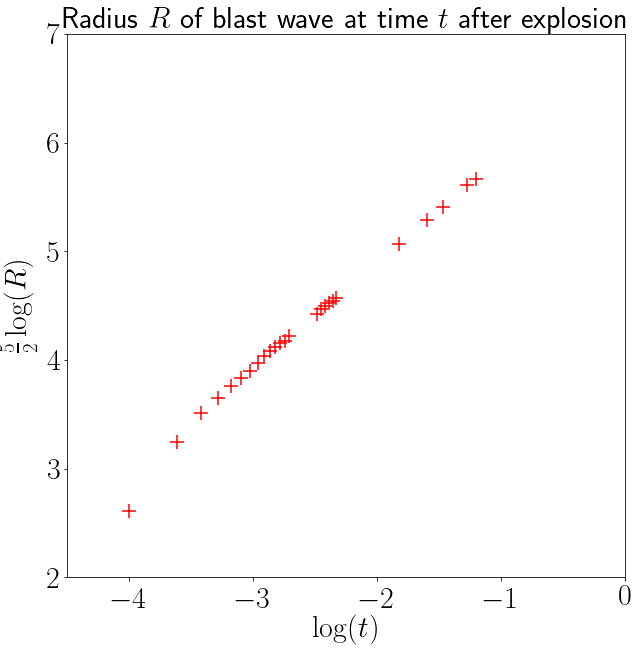

In [7]:
# Create the axes for the plotting
fig, ax = plt.subplots(figsize=(10,10))

# Set some basic variables that we'll use to adjust the axis ranges
xmin, xmax = -4.5, 0
ymin, ymax = 2, 7

# Add a scatter plot to the axes
ax.scatter(df_Trinity['log10_t'], df_Trinity['5/2*log10_R'], s=180, marker='+', color='r')

# Clean up the aesthetics a bit
ax.set(xlim=[xmin, xmax], 
       ylim=[ymin, ymax], 
       xlabel=r'$\log(t)$', 
       ylabel=r'$\frac{5}{2}\log(R)$',
       title=r'Radius $R$ of blast wave at time $t$ after explosion'
      );

# Safe plot to a file
fig.savefig('TrinityBlastWave-raw.pdf', bbox_inches='tight')

## Extracting a "result" from the data

The plot above is great, but the plot itself does not tell us anything about the dynamics or kinematics of the blast. For that, we need to fit for the $y$-intercept.

### Fitting the data

Let's fit a straight line to this data using a simple linear regression

First, extract the values of the data into a simple array which is more easily used by numpy for fitting.

In [8]:
values_logt = df_Trinity['log10_t'].values
values_logt

array([-4.        , -3.61978876, -3.4202164 , -3.28399666, -3.18045606,
       -3.09691001, -3.02687215, -2.96657624, -2.91364017, -2.86646109,
       -2.82390874, -2.78251606, -2.74714697, -2.71444269, -2.4867824 ,
       -2.45222529, -2.4202164 , -2.39040559, -2.36251027, -2.33629907,
       -1.82390874, -1.60205999, -1.46852108, -1.27572413, -1.20760831])

Manipulate the array so that we get a set of values that can be easily input into the `LinearRegression` library for `scikit-learn`: [`fit(X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). 

For this, we have to use `array.reshape(1, -1)` since the data represents just a single "sample" of the relationship (i.e. just one "experiment"). If you try to just use the simple 1-D array directly, you'll get an error message from `scikit-learn` telling you to do exactly this anyway.

In [9]:
X = values_logt.reshape(1, -1).T
X

array([[-4.        ],
       [-3.61978876],
       [-3.4202164 ],
       [-3.28399666],
       [-3.18045606],
       [-3.09691001],
       [-3.02687215],
       [-2.96657624],
       [-2.91364017],
       [-2.86646109],
       [-2.82390874],
       [-2.78251606],
       [-2.74714697],
       [-2.71444269],
       [-2.4867824 ],
       [-2.45222529],
       [-2.4202164 ],
       [-2.39040559],
       [-2.36251027],
       [-2.33629907],
       [-1.82390874],
       [-1.60205999],
       [-1.46852108],
       [-1.27572413],
       [-1.20760831]])

In [10]:
values_logR = df_Trinity['5/2*log10_R'].values
values_logR

array([2.61330745, 3.24713269, 3.51208429, 3.64848122, 3.75947671,
       3.83506527, 3.89976656, 3.974874  , 4.03195964, 4.07860942,
       4.11845743, 4.15689458, 4.17793211, 4.2188224 , 4.42713003,
       4.46510303, 4.49662661, 4.52052743, 4.5422596 , 4.57003766,
       5.06837402, 5.28485838, 5.40342001, 5.60759512, 5.66792932])

In [11]:
values_logt.shape, X.shape, values_logR.shape

((25,), (25, 1), (25,))

#### Perform the actual fit

In [12]:
from sklearn.linear_model import LinearRegression

trinity_model = LinearRegression()
trinity_model.fit(X, values_logR)

print(f'slope    : m = {trinity_model.coef_[0]:.3f}')
print(f'intercept: b = {trinity_model.intercept_:.3f}')

slope    : m = 1.015
intercept: b = 6.942


### Interpreting the results

Now we have the $y$-intercept for the Trinity blast...but what does this tell us?

The energy is given in terms of the intercept $b$ as

$$ b = \frac{1}{2} \log \left(\frac{E}{k^5 \rho}\right) $$

where $\rho$=1.23 kg/m$^3$ is the density of air. 

The undetermined factor $k$ is more difficult, however. The good news is that Taylor determined the value using numerical integration to find an approximation, Sedov found an exact form. 

As also relayed by Diaz in his paper, there are accounts that say that Taylor scaled up the value of $k$ from small explosions, which is not true. The focus of the theoretical discussion in his first paper is about solving the hydrodynamic equations of the shock wave to find the value of this factor. 

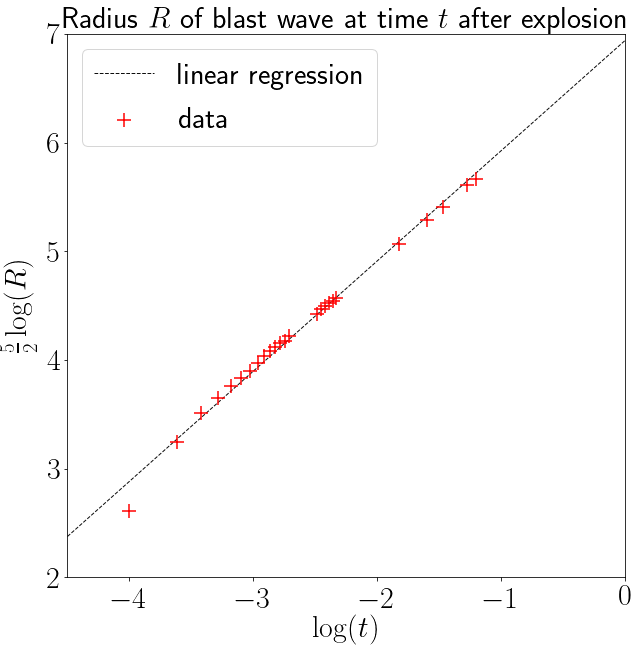

In [13]:
# Create the axes for the plotting
fig, ax = plt.subplots(figsize=(10,10))

# Set some basic variables that we'll use to adjust the axis ranges
xmin, xmax = -4.5, 0
ymin, ymax = 2, 7

# Add a scatter plot to the axes
ax.scatter(df_Trinity['log10_t'], df_Trinity['5/2*log10_R'], s=180, marker='+', color='r', label='data', zorder=10)

# Add a linear fit
trinity_logt = np.linspace(xmin, xmax, 2)
ax.plot(trinity_logt, 
        trinity_model.intercept_ + trinity_model.coef_[0] * trinity_logt, 
        'k--', 
        linewidth=1, 
        label=f'linear regression', 
        zorder=0, 
        alpha=0.95)

# Show the legend
ax.legend();

# Clean up the aesthetics a bit
ax.set(xlim=[xmin, xmax], 
       ylim=[ymin, ymax], 
       xlabel=r'$\log(t)$', 
       ylabel=r'$\frac{5}{2}\log(R)$',
       title=r'Radius $R$ of blast wave at time $t$ after explosion'
      );

# Safe plot to a file
fig.savefig('TrinityBlastWave-fit.pdf', bbox_inches='tight')

### Determining the energy of the blast

The energy is given in terms of the intercept $b$ as

$$ E_0 = k^5 10^{2b}\rho_0 $$

where $\rho_0$=1.23 kg/m$^3$ in the density of the undisturbed air, and the constant $k$ is determined by evaluating the hydrodynamics of air under intense pressure changes. By using the standard specific heat ratio $\gamma$ (where $\gamma=1.4$ for air) the constant was determined by Taylor to be $k^5 = S(1.4)^{-5}$ = 0.856.

In [15]:
# explosion yield in kt TNT
# 4.18 TJ = 1 kt TNT
#E0 = 10**(2*trinity_model.intercept_) * 0.856 * 1.23
E0 = 10**(2*6.9) * 0.856 * 1.23
print(f'Trinity: Energy = {E0 / ( 4.184e12):.2f} kt TNT  ({E0:.4E} J)')

Trinity: Energy = 15.88 kt TNT  (6.6432E+13 J)
